# Distribuição Binomial - Python
### A Distribuição Binomial é a distribuição de probabilidades discretas do número de sucessos em uma sequência onde:

* Cada tentativa possui duas possibilidades: sucesso ou fracasso; 
* Cada tentativa é independente das demais;
* A probabilidade de sucesso a cada tentativa permanece constante independente das demais;
* A variável pretendida é o número de sucesso nas tentativas


In [123]:
from scipy.stats import binom, norm, probplot, shapiro
import statistics as statis
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [6]:
#Jogando 1 moedas cinco vezes qual a probabilidade de dar cara 3 vezes?
pb = binom.pmf(3, 5, 0.5)
print('A probabilidade de jogar uma moedas cinco vezes e cairem 3 caras é de: ', pb)

A probabilidade de jogar uma moedas cinco vezes e cairem 3 caras é de:  0.3125


In [28]:
#Se passarmos por 4 sinaleiros de transito de 4 tempos cada, qual a probabilidade de pegarmos 0, 1, 2, 3 ou 4 destes sinais verdes?
pb2 = binom.pmf(0, 4, 0.25)
pb3 = binom.pmf(1, 4, 0.25)
pb4 = binom.pmf(2, 4, 0.25)
pb5 = binom.pmf(3, 4, 0.25)
pb6 = binom.pmf(4, 4, 0.25)
print('A probabilidade de pegarmos nenhum sinaleiro verde é de:{},\nde pegarmos 1 sinal verde é de:{},\nde pegarmos 2 é de:{},\nde pegarmos 3 é de:{},\ne de pegarmos os 4 é de:{}.'.format(pb2, pb3, pb4, pb5, pb6))

A probabilidade de pegarmos nenhum sinaleiro verde é de:0.31640625000000006,
de pegarmos 1 sinal verde é de:0.4218750000000001,
de pegarmos 2 é de:0.21093750000000006,
de pegarmos 3 é de:0.046875000000000035,
e de pegarmos os 4 é de:0.003906250000000001.


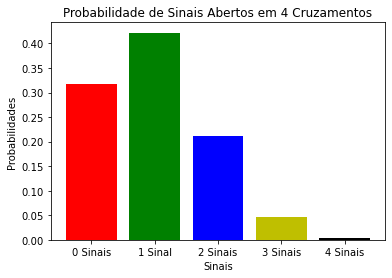

In [44]:
prob = [pb2, pb3, pb4, pb5, pb6]
labels = ['0 Sinais', '1 Sinal', '2 Sinais', '3 Sinais', '4 Sinais']
plt.bar(labels, prob, color = ['r', 'g', 'b', 'y', 'k'],)
plt.ylabel('Probabilidades')
plt.xlabel('Sinais')
plt.title('Probabilidade de Sinais Abertos em 4 Cruzamentos')
plt.show()


In [45]:
#Calculo da Probabilidade Cumulativa
pc = binom.cdf(4, 4, 0.25)
print('Neste caso estamos acumulando todas as probabilidades:', pc,'.')

Neste caso estamos acumulando todas as probabilidades: 1.0 .


In [49]:
#Em uma prova de 12 questões, com 4 opções cada, qual a probabilidade de acertar 7 questões aleatóriamente?
pb7 = binom.pmf(7, 12, 0.25) 
print('A probabilidade de acertar 7 questões em 12 é de:', pb7)

A probabilidade de acertar 7 questões em 12 é de: 0.011471271514892573


## Distribuição Normal ou Gaussiana
###  A Distribuição Normal representa a soma de efeitos independentes que, ocorrendo multiplas vezes, distribui-se normalmente (sujeitos a determinados pressupostos).
* É representada por uma curva simétrica ao redor da média (em formato de sino);
* Nela, a média, a mediana e a moda dos dados possuem o mesmo valor;
* Em uma Distribuição Normal Padrão, a Média é zero e o Desvio Padrão igual a 1;
* A distribuição das probabilidades empíricas de uma distribuição normal é: 68% - 95% - 99.7%;
* Ao contrário da Distribuição Binomial (que é discreta), a Distribuição Normal (que é contínua) é infinita, definida por todos os números reais;
* As probabilidades são calculadas pela área entre dois pontos (intervalos) a baixo da curva Gauss utilizando cálculo integral da função densidade de probabilidade;
* O cálculo das probabilidades são cumulativas;
* O valor Z mostra o número de desvios padrões que o valor determinado esta com relação à média.

### Ajustando Normal ao Histograma

In [107]:
x = np.random.randint(0,10, size=(16)) ##Gerando números aleatórios


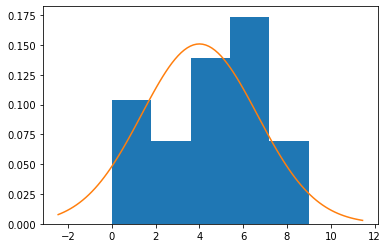

In [108]:
plt.hist(x, bins=5, density=True)
media = statis.mean(x) 
dp = statis.pstdev(x) ##Desvio Padrão
xmin, xmax = plt.xlim()
eixox = np.linspace(xmin-2, xmax+2, 100)
eixoy = norm.pdf(eixox, media, dp) ##Função Distribuição de Probabilidade
plt.plot(eixox, eixoy)

In [11]:
# Em uma distribuição normal com média de 8 quilos e desvio padrão de 2 quilos,
# qual a probabilidade de selecionarmos um objeto com peso menor que 6 quilos.
pn = round(norm.cdf(6, 8, 2) *100, 2) ## cdf para c´lculos com valores menores que a média
print('A probabilidade de selecionarmos um  objeto com menos de 6 quilos é igual a: {} %'.format(pn))

A probabilidade de selecionarmos um  objeto com menos de 6 quilos é igual a: 15.87 %


In [14]:
# Em uma distribuição normal com média de 8 quilos e desvio padrão de 2 quilos,
# qual a probabilidade de selecionarmos um objeto com peso MAIOR que 6 quilos.
pn1 = round(norm.sf(6, 8, 2) *100, 2) ## sf para calcular valores a cima da média
#pn1 = 100 - pn
print('A probabilidade de selecionarmos um objeto com mais de 6 quilos é igual a: {} %'.format(pn1))

A probabilidade de selecionarmos um objeto com mais de 6 quilos é igual a: 84.13 %


In [20]:

# Em uma distribuição normal com média de 8 quilos e desvio padrão de 2 quilos,
# qual a probabilidade de selecionarmos um objeto com peso MENOR que 6 quilos ou MAIOR que 10 quilos.
pn2 = round(norm.cdf(6, 8, 2) + norm.sf(10, 8, 2),4)

print('A probabilidade do objeto ter menos que 6 quilos ou mais que 10 quilos é: {}'.format(pn2))

A probabilidade do objeto ter menos que 6 quilos ou mais que 10 quilos é: 0.3173


In [26]:
# Em uma distribuição normal com média de 8 quilos e desvio padrão de 2 quilos,
# qual a probabilidade de selecionarmos um objeto com peso Menor que 10 quilos e MAIOR que 8 quilos.

pn3 = round(norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2),4)

print('A probabilidade do objeto ter menos que 6 quilos e mais que 10 quilos é: {}'.format(pn3))

A probabilidade do objeto ter menos que 6 quilos e mais que 10 quilos é: 0.3413


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

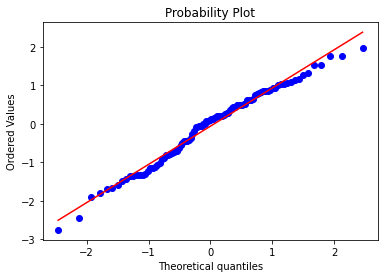

In [34]:
# Testes de Normalidade
# Gerando dados normalmente distribuídos
data = norm.rvs(size = 100)
probplot(data, plot = plt)

In [36]:
#Teste com Shapiro-Wilk
shapiro(data)


ShapiroResult(statistic=0.9816713333129883, pvalue=0.17903681099414825)

### Comparação entre uma Distribuição Uniforme e uma Distribuiçõ Normal

(array([100.,  91.,  85., 100., 102.,  96., 106., 103., 114., 103.]),
 array([-0.99514935, -0.79588233, -0.5966153 , -0.39734828, -0.19808126,
         0.00118576,  0.20045279,  0.39971981,  0.59898683,  0.79825385,
         0.99752088]),
 <a list of 10 Patch objects>)

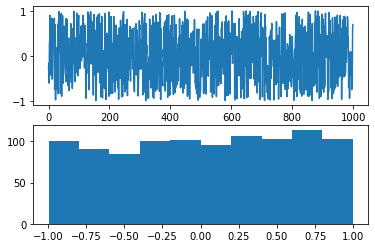

In [117]:
##Criando distribuição com a mesma probabilidade (Uniforme)
l = []
for i in range(1000):
    x = random.uniform(-1,1)
    l.append(x)
plt.subplot(211)
plt.plot(l)
plt.subplot(212)
plt.hist(l,bins=10)

(array([  3.,  19.,  69., 187., 291., 242., 134.,  44.,   9.,   2.]),
 array([-3.37399934, -2.6601798 , -1.94636027, -1.23254074, -0.5187212 ,
         0.19509833,  0.90891786,  1.6227374 ,  2.33655693,  3.05037646,
         3.764196  ]),
 <a list of 10 Patch objects>)

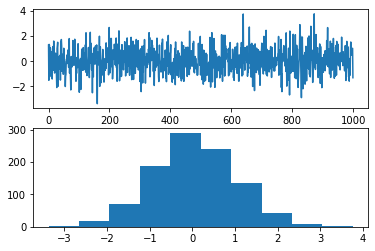

In [118]:
##Criando distribuição Normal
l = []
for i in range(1000):
    x = random.gauss(0, 1)
    l.append(x)
plt.subplot(211)
plt.plot(l)
plt.subplot(212)
plt.hist(l,bins=10)

(array([  3.,  19.,  69., 187., 291., 242., 134.,  44.,   9.,   2.]),
 array([-3.37399934, -2.6601798 , -1.94636027, -1.23254074, -0.5187212 ,
         0.19509833,  0.90891786,  1.6227374 ,  2.33655693,  3.05037646,
         3.764196  ]),
 <a list of 10 Patch objects>)

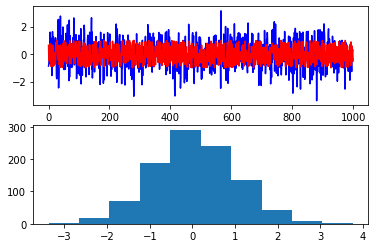

In [120]:
l1 = []
l2 = []

for i in range(1000):
    x = random.gauss(0,1)
    l1.append(x)
    x = random.uniform(-1,1)
    l2.append(x)
plt.subplot(211)
plt.plot(l1, 'b')
plt.plot(l2, 'r')
plt.subplot(212)
plt.hist(l,bins=10)

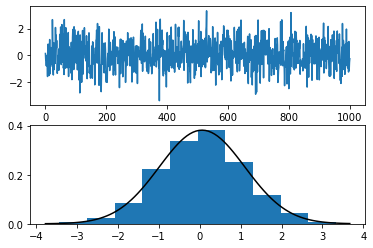

In [127]:
## Distribuição Normal Teórica
l = []
for i in range(1000):
    x = random.gauss(0, 1)
    l.append(x)
plt.subplot(211)
plt.plot(l)
plt.subplot(212)
plt.hist(l,bins=10, density=True)
xmin, xmax = plt.xlim()
med = statis.mean(l)
desv = statis.pstdev(l)
eix = np.linspace(xmin, xmax, 100)
eiy = norm.pdf(eix, med, desv)
plt.plot(eix, eiy, color='k')

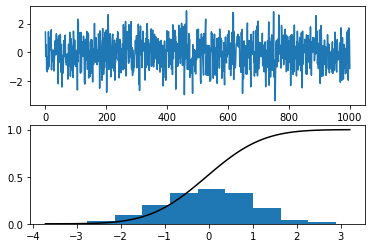

In [128]:
## Distribuição Normal Teórica com curva acumulativa
l = []
for i in range(1000):
    x = random.gauss(0, 1)
    l.append(x)
plt.subplot(211)
plt.plot(l)
plt.subplot(212)
plt.hist(l,bins=10, density=True)
xmin, xmax = plt.xlim()
med = statis.mean(l)
desv = statis.pstdev(l)
eix = np.linspace(xmin, xmax, 100)
eiy = norm.cdf(eix, med, desv)
plt.plot(eix, eiy, color='k')